In [1]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
#aggregation of the data tables for best rmsd from the 3 notebooks with best rmsd data based on top x rmsd
data = {
    'Dataset': ['Rosetta Motifs (close_res)', 'Alphafold3"'],
    'All Placements': [[17,1,0],[12,4,2]],
    'Top 10 ddG': [[14,1,3],[11,5,2]],
    'Top 1 ddg': [[13,2,3],[8,4,6]]
}
# Convert data into DataFrame for easier handling
df = pd.DataFrame(data)
df = df.set_index('Dataset')

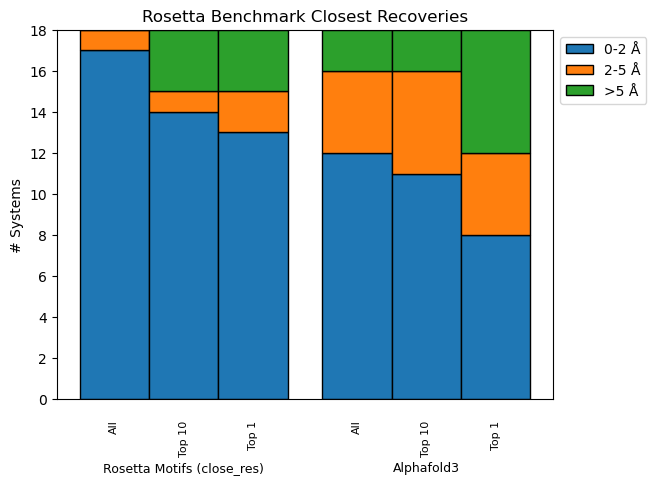

In [4]:
# Set up plot
fig, ax = plt.subplots()

# Number of datasets and trials
num_datasets = len(df)
num_trials = len(df.columns)

# Define bar width and offset for clustered bars with extra spacing
bar_width = 0.2
spacing = 0.1  # Additional spacing between each dataset
x = np.arange(num_datasets) * (num_trials * bar_width + spacing)  # Increased gap

# Colors for the 3 stacked segments
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Define 3 distinct colors for each segment

# Plot each trial as a separate group of stacked bars
for i, trial in enumerate(df.columns):
    bottom = np.zeros(num_datasets)  # Start stacking from the bottom for each trial
    for j in range(3):  # There are 3 values per dataset per trial
        values = [val[j] for val in df[trial]]
        ax.bar(
            x + i * bar_width, 
            values, 
            width=bar_width, 
            label=f'{trial} - Value {j+1}' if i == 0 else "",  # Add label only once for legend
            color=colors[j],
            bottom=bottom,
            edgecolor='black'
        )
        # Update the bottom for stacking
        bottom += values

# Set x-axis labels and positions
#ax.set_xticks(x + bar_width * (num_trials - 1) / 2)
#ax.set_xticklabels(df.index)

# Set x-ticks to be centered and add dataset labels
ax.set_xticks(x + bar_width)  # Center x-ticks in the middle of each dataset cluster
ax.set_xticklabels([])  # Remove the default dataset labels for now

# Add labels and title
# Move the x-axis label down using labelpad
#ax.set_xlabel('Software', labelpad=60)  # Adjust the labelpad value as needed

ax.set_ylabel('# Systems')
ax.set_title('Rosetta Benchmark Closest Recoveries')

#Å

custom_labels = ["0-2 Å","2-5 Å",">5 Å"]

# Create a legend
ax.legend(custom_labels, loc="upper left", bbox_to_anchor=(1, 1))

# Annotate each cluster of bars with trial labels
trials = ["All", "Top 10", "Top 1"]
datasets = ['Rosetta Motifs (close_res)', 'Alphafold3']
for i, trial in enumerate(trials):
    for j, dataset in enumerate(datasets):
        #ax.text(x[j] + i * bar_width, bottom[j], trial, ha='center', va='bottom', rotation=90)
        label_position = -1  # Adjust this value to position the labels lower if needed
        ax.text(x[j] + i * bar_width, label_position, trials[i], ha='center', va='top', rotation=90, fontsize=8)

# Annotate dataset labels below trial labels
for j in range(len(datasets)):
    # Set label position for dataset labels even lower than trial labels
    dataset_label_position = -3  # Position for dataset labels
    ax.text(x[j] + bar_width, dataset_label_position, datasets[j], ha='center', va='top', rotation=0, fontsize=9)

# Adjust the y-limits to allow space for the labels
ax.set_ylim(bottom=0)  # Extend y-axis to provide space for the labels

# Remove the tick marks below each bar
ax.tick_params(axis='x', which='both', bottom=False)  # Hide ticks on the x-axis

plt.show()